## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Dataset

In [2]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

## Explore Dataset

In [3]:
print("Dataset Shape:", X.shape)
print("Feature Names:", cancer.feature_names)
print("Target Names:", cancer.target_names)
print("First 5 Rows:\n", X[:5])

Dataset Shape: (569, 30)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names: ['malignant' 'benign']
First 5 Rows:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 

## Select Features

In [4]:
X = X[:, :2]

## Train–Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Build SVM Model

In [6]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

## Predict Test Data

In [7]:
y_pred = model.predict(X_test)


## Compare Predictions

In [8]:
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

comparison["Result"] = np.where(
    comparison["Actual"] == comparison["Predicted"],
    "Correct",
    "Wrong"
)

print("\nPrediction Comparison:\n")
print(comparison.head(10))


Prediction Comparison:

   Actual  Predicted   Result
0       1          1  Correct
1       0          0  Correct
2       0          0  Correct
3       1          1  Correct
4       1          1  Correct
5       0          0  Correct
6       0          0  Correct
7       0          0  Correct
8       1          1  Correct
9       1          1  Correct


## Evaluate Model Performance

In [9]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9064327485380117

Confusion Matrix:
 [[ 52  11]
 [  5 103]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        63
           1       0.90      0.95      0.93       108

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



## Visualize Decision Boundary

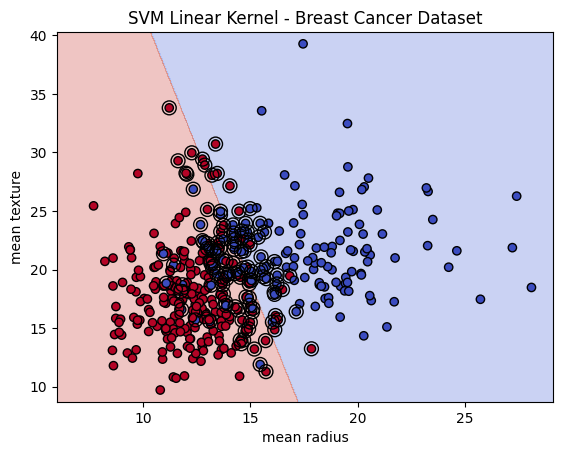

In [10]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)


plt.scatter(X_train[:, 0], X_train[:, 1],
            c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')


plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='black')

plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title("SVM Linear Kernel - Breast Cancer Dataset")
plt.show()

## Conclusion




The SVM algorithm was successfully implemented and tested on the dataset. The model was trained using a linear kernel and evaluated using accuracy and other performance metrics. The visualization clearly showed the decision boundary and support vectors. The results indicate that SVM is an effective classification algorithm for separating data into distinct classes.